In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
plt.style.use('seaborn')

C:\Users\aless\AppData\Local\Temp\ipykernel_34980\76635771.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [2]:
sigma_eps = 0.1
R_eps = np.eye(3) * sigma_eps**2

In [3]:
N = 10000
dt = 0.025
r = 0.1

x0 = np.array([0, 0])
x_hat = np.zeros((2, N))
x_true = np.zeros((2, N))

P = np.zeros((2, 2, N))
P[:,:,0] = np.eye(2) * 0
x_hat[:,0] = x0
x_true[:,0] = x0

u = np.array([1, 0.1])

eta = np.zeros((3,N))
eps = np.zeros((3,N))

H = np.matrix([1,0])
sigma_xi_x = 0.1

# Compute ground truth
for i in range(N-1):
    A = np.matrix([[0, r], [-r, 0]])
    B = np.eye(2)

    Ad = sp.linalg.expm(A * dt)
    Bd = np.linalg.inv(A) @ (Ad - np.eye(2)) @ B

    x_true[:,i+1] = Ad @ x_true[:,i] + Bd @ u



for i in range(N-1):
    eps[:,i] = np.random.multivariate_normal([0, 0, 0], R_eps)

    A = np.matrix([[0, r], [-r, 0]]) # Qui devo inserire il rumore o?
    G = np.matrix([[x_hat[0, i], 1, 0], [-x_hat[1, i], 0, 1]])
    B = np.eye(2)

    Ad = sp.linalg.expm(A * dt)
    Bd = np.linalg.inv(A) @ (Ad - np.eye(2)) @ B
    R_eta =  1/2 * dt * np.linalg.inv(A) @ (sp.linalg.expm(2 * A * dt) - np.eye(2)) @ G @ R_eps @ G.T

    z = H @ x_true[:,i] + np.random.randn() * sigma_xi_x**2

    # Prediction step
    x_hat[:,i+1] = Ad @ x_hat[:,i] + Bd @ (u + eps[1:,i])
    P[:,:, i+1] = Ad @ P[:,:,i] @ Ad.T + R_eta

    # Update step
    s = H @ P[:,:,i+1] @ H.T + sigma_xi_x**2
    w = P[:,:,i+1] @ H.T @ np.linalg.inv(s)
    x_hat[:,i+1] = x_hat[:,i+1] + (w @ (z.T - H @ x_hat[:,i+1])).T
    P[:,:,i+1] =  (np.eye(2) - w @ H) @ P[:,:,i+1]


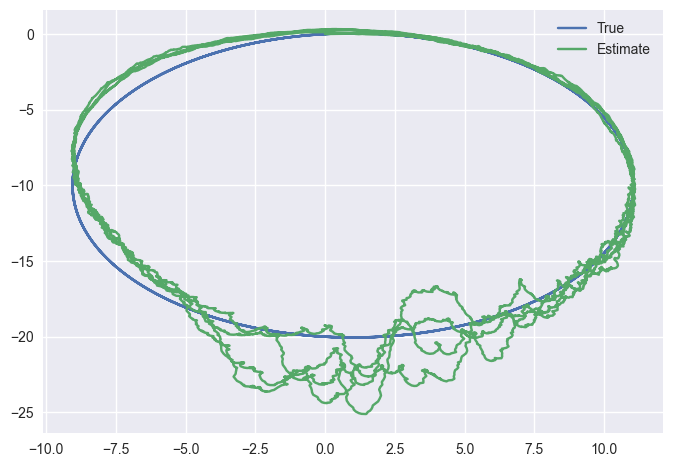

In [6]:
plt.plot(x_true[0,:], x_true[1,:])
plt.plot(x_hat[0,:], x_hat[1,:])
plt.legend(['True', 'Estimate'])